# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
from pandas.io.json import json_normalize

In [2]:
os.getcwd()

'C:\\Users\\alehe\\OneDrive\\Documents\\Jupyter\\data_wrangling_json'

In [8]:
os.chdir('C:/Users/alehe/OneDrive/Documents/Jupyter/data_wrangling_json/data')

In [9]:
df = pd.read_json('world_bank_projects.json')
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


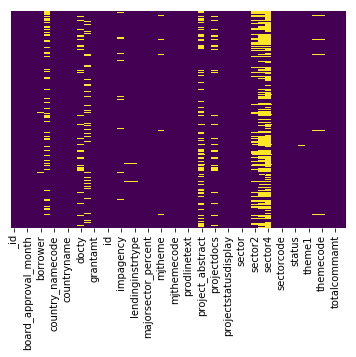

In [10]:
#Getting a visual over view of the data that is and isn't present
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [13]:
df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [14]:
# Question 1. Find the 10 countries with most projects
#This code aggregates all of the project names that are associated with each country and counts them.
# the count methods used for counting them all up ;) and sorting them with the sort values method
#The issue that arrives with the data now is that the 10th position shows Africa as a country with 11
# projects. Africa is not a country.


df['project_name'].groupby(df['countryshortname']).count().sort_values(ascending = False).head(10)

countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Name: project_name, dtype: int64

In [15]:
first_list = "Algeria Angola Benin Botswana Burkina_Faso Burundi Cabo_Verde Cameroon Central_African_Republic".split(" ")
second_list = "Chad Comoros Democratic_Republic_of_the_Congo Gabon Gambia Ghana Guinea Guinea_Bissau Republic of the Congo".split(" ")
third_list = "Cote_d_Ivoire Djibouti Egypt Equatorial Guinea Eritrea Eswatini (formerly Swaziland) Ethiopia Kenya".split(" ")
fourth_list = "Lesotho Liberia Libya Madagascar Malawi Mali Mauritania Mauritius Morocco Mozambique Namibia Niger Nigeria".split(" ")       
fifth_list = "Rwanda Sao_Tome_and_Principe Senegal Seychelles Sierra_Leone Somalia South_Africa South_Sudan Eswatini".split(" ")
last_list = "Tanzania Togo Tunisia Sudan Uganda Zambia Zimbabwe".split(" ")

In [16]:
data_set_country_names = df.countryshortname
New_country_list = data_set_country_names.tolist()
print(New_country_list)

['Ethiopia', 'Tunisia', 'Tuvalu', 'Yemen, Republic of', 'Lesotho', 'Kenya', 'India', 'China', 'India', 'Morocco', 'South Sudan', 'India', 'Ghana', 'Timor-Leste', 'Jordan', 'Samoa', 'Samoa', 'Madagascar', 'Cambodia', 'Morocco', 'Kyrgyz Republic', 'Nepal', 'Jordan', 'Tajikistan', 'Azerbaijan', 'East Asia and Pacific', "Lao People's Democratic Republic", 'Pacific Islands', 'Solomon Islands', 'Mozambique', 'Angola', 'Tanzania', 'Nigeria', 'Seychelles', 'Bangladesh', 'Senegal', 'Myanmar', 'West Bank and Gaza', 'Argentina', 'Gambia, The', 'Russian Federation', 'Congo, Republic of', 'Russian Federation', 'Sao Tome and Principe', 'Solomon Islands', 'Africa', 'Africa', 'Ukraine', 'Comoros', 'Colombia', 'Yemen, Republic of', 'Africa', 'Pacific Islands', "Cote d'Ivoire", 'Sierra Leone', 'World', 'Pacific Islands', 'India', 'Africa', 'Solomon Islands', 'Peru', "Cote d'Ivoire", 'Ecuador', 'Honduras', 'Afghanistan', 'Africa', 'Morocco', 'Mauritania', 'Lebanon', 'West Bank and Gaza', 'Tajikistan', 'B

In [17]:
all_countries_in_Africa = first_list + second_list + third_list + fourth_list + fifth_list + last_list

In [18]:
#This function shows that there are many countries on in africa that are also in the country name list 
#infering that Africa is not a valid anwer to be included in the top 10 countries with the most projects
# answer for question 1

def repeat_countries(list1, list2):
    
    return list(set(list1) & set(list2))

repeat_countries(all_countries_in_Africa, New_country_list)

['Rwanda',
 'Zambia',
 'Burundi',
 'Mali',
 'Benin',
 'Tanzania',
 'Chad',
 'Djibouti',
 'Mozambique',
 'Ghana',
 'Zimbabwe',
 'Mauritius',
 'Niger',
 'Morocco',
 'Sudan',
 'Lesotho',
 'Uganda',
 'Seychelles',
 'Nigeria',
 'Namibia',
 'Madagascar',
 'Mauritania',
 'Liberia',
 'Tunisia',
 'Cameroon',
 'Kenya',
 'Senegal',
 'Guinea',
 'Ethiopia',
 'Angola',
 'Comoros',
 'Togo',
 'Malawi']

In [19]:
#With the continent of Africa dropped, there are three countries that tie for 9 projects each
# Pakistan, Brazil, and Burkina Faso

df['project_name'].groupby(df['countryshortname']).count().sort_values(ascending = False).drop('Africa').head(12)

countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Pakistan               9
Brazil                 9
Burkina Faso           9
Name: project_name, dtype: int64

In [21]:
new_df = json.load((open('world_bank_projects.json')))

In [22]:
#Question 2 - Find the top 10 major project themes (using column 'mjtheme_namecode')

#The data shows that the 7th largest account for project name is not available, hence the top project names would range from 
# Environment and natural resources management to Economic management
new_df = json.load((open('world_bank_projects.json')))
project_themes = json_normalize(new_df, 'mjtheme_namecode')
project_themes.name.value_counts()

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: name, dtype: int64